In [68]:
import pandas as pd
import os
import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

Merge the index data


In [69]:
folder_path = '/Users/sherry/Documents/MGTF 495 Current Topic/Group Project /Group Project data/EM'
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]
dfs = []
for file in excel_files:
    df = pd.read_excel(os.path.join(folder_path, file))
    file_name = os.path.splitext(file)[0] 
    df.columns = [df.columns[0], file_name] + list(df.columns[2:])
    dfs.append(df)
merged_df = dfs[0] 
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on=merged_df.columns[0], how='outer')
merged_df = merged_df.fillna(0)

print(merged_df.head())
merged_df.to_excel('/Users/sherry/Documents/MGTF 495 Current Topic/Group Project /Group Project data.xlsx', index=False)


        Date     Egypt  Malaysia  Colombia  Indonesia     China  Thailand  \
0 2000-01-03  0.022271  0.038511       0.0   0.000000  0.000000  0.000000   
1 2000-01-04  0.016728 -0.003546       0.0   0.024499  0.031083  0.027975   
2 2000-01-05  0.004185 -0.021476       0.0  -0.033203 -0.002485 -0.074333   
3 2000-01-06 -0.012594  0.000769       0.0   0.010552  0.037650 -0.050453   
4 2000-01-07  0.000000  0.000000       0.0   0.000000  0.040586  0.030315   

      India    Brazil    Mexico  
0  0.071113 -0.010735 -0.004490  
1  0.024258 -0.053184 -0.049033  
2 -0.022872  0.021580  0.016114  
3  0.003516 -0.006677 -0.004154  
4 -0.024089  0.010434  0.044822  


/var/folders/x0/b3wfczlx4f11sf2611g29r7r0000gn/T/ipykernel_82915/3731088061.py:15: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  merged_df.to_excel('/Users/sherry/Documents/MGTF 495 Current Topic/Group Project /Group Project data.xlsx', index=False)


Data Cleaning 

In [70]:
merged_df = merged_df.fillna(0)

In [71]:
event_periods = {
    '2000': [('2000-04-10', '2000-05-03'), ('2000-08-07', '2000-08-30'), ('2000-11-03', '2000-11-26')],
    '2001': [('2001-01-09', '2001-02-01'), ('2001-05-15', '2001-06-09'), ('2001-09-05', '2001-09-29')],
    '2002': [('2002-02-13', '2002-03-06'), ('2002-06-12', '2002-07-05'), ('2002-10-03', '2002-10-26')],
    '2003': [('2003-03-14', '2003-04-07'), ('2003-07-07', '2003-07-31'), ('2003-11-09', '2003-12-02')],
    '2004': [('2004-02-16', '2004-03-09'), ('2004-06-14', '2004-07-07'), ('2004-10-14', '2004-11-04')],
    '2005': [('2005-01-14', '2005-02-07'), ('2005-05-03', '2005-05-27'), ('2005-09-01', '2005-09-22')],
    '2006': [('2006-03-02', '2006-03-25'), ('2006-07-05', '2006-07-29'), ('2006-11-05', '2006-11-28')],
    '2007': [('2007-01-13', '2007-02-01'), ('2007-05-24', '2007-06-14'), ('2007-09-06', '2007-09-29')],
    '2008': [('2008-03-04', '2008-03-27'), ('2008-07-15', '2008-08-08'), ('2008-11-24', '2008-12-13')],
    '2009': [('2009-01-11', '2009-02-01'), ('2009-05-06', '2009-05-30'), ('2009-09-07', '2009-09-29')],
    '2010': [('2010-04-18', '2010-05-11'), ('2010-08-20', '2010-09-12'), ('2010-12-10', '2010-12-30')],
    '2011': [('2011-03-30', '2011-04-23'), ('2011-08-02', '2011-08-26'), ('2011-11-24', '2011-12-13')],
    '2012': [('2012-03-12', '2012-04-04'), ('2012-07-14', '2012-08-07'), ('2012-11-06', '2012-11-26')],
    '2013': [('2013-02-23', '2013-03-17'), ('2013-06-26', '2013-07-20'), ('2013-10-21', '2013-11-10')],
    '2014': [('2014-02-06', '2014-02-11'), ('2014-06-07', '2014-07-01'), ('2014-10-04', '2014-10-25')],
    '2015': [('2015-01-21', '2015-02-11'), ('2015-05-18', '2015-06-11'), ('2015-09-17', '2015-10-09')],
    '2016': [('2016-01-05', '2016-01-25'), ('2016-04-28', '2016-05-22'), ('2016-08-30', '2016-09-22')],
    '2017': [('2017-04-09', '2017-05-03'), ('2017-08-12', '2017-09-05'), ('2017-12-03', '2017-12-22')],
    '2018': [('2018-03-22', '2018-04-15'), ('2018-07-26', '2018-08-18'), ('2018-11-16', '2018-12-06')],
    '2019': [('2019-03-05', '2019-03-28'), ('2019-07-07', '2019-07-31'), ('2019-10-31', '2019-11-20')],
    '2020': [('2020-02-16', '2020-03-09'), ('2020-06-17', '2020-07-12'), ('2020-10-13', '2020-11-03')],
    '2021': [('2021-01-30', '2021-02-20'), ('2021-05-29', '2021-06-22'), ('2021-09-27', '2021-10-18')],
    '2022': [('2022-01-14', '2022-02-03'), ('2022-05-10', '2022-06-02'), ('2022-09-09', '2022-10-02')],
    '2023': [('2023-04-21', '2023-05-14'), ('2023-08-23', '2023-09-15'), ('2023-12-13', '2024-01-01')]
}


In [72]:
df['Date'] = pd.to_datetime(df['Date'])

def create_mercury_dummy(df, event_periods):
    mercury_dummy = np.zeros(len(df), dtype=int)
    
    # Loop through each year in the event_periods
    for year, periods in event_periods.items():
        # Loop through each period for the specific year
        for start_date, end_date in periods:
            start_date = pd.to_datetime(start_date)
            end_date = pd.to_datetime(end_date)
            
            # Create dummy for dates in the range of this period
            mercury_dummy |= ((df['Date'] >= start_date) & (df['Date'] <= end_date)).astype(int)
    
    return mercury_dummy


merged_df['Mercury_Retrograde'] = create_mercury_dummy(merged_df, event_periods)
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df = merged_df.melt(id_vars=['Date', 'Mercury_Retrograde'], var_name='Country', value_name='Return')

# Strip spaces or any invisible characters from column names
merged_df.columns = merged_df.columns.str.strip()
merged_df['Return_Lag_1'] = merged_df.groupby('Country')['Return'].shift(1)
merged_df['Return_Lag_2'] = merged_df.groupby('Country')['Return'].shift(2)
merged_df['Return_Lag_3'] = merged_df.groupby('Country')['Return'].shift(3)
merged_df = merged_df.dropna(subset=['Return_Lag_1','Return_Lag_2','Return_Lag_3'])
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Year_Quarter'] = merged_df['Date'].dt.year.astype(str) + '-Q' + ((merged_df['Date'].dt.month - 1) // 3 + 1).astype(str)
merged_df['Return_Volatility'] = merged_df.groupby('Country')['Return'].rolling(window=30, min_periods=1).std().reset_index(level=0, drop=True)
merged_df['Lagged_Return_Volatility_1'] = merged_df.groupby('Country')['Return_Volatility'].shift(1)
merged_df['Lagged_Return_Volatility_2'] = merged_df.groupby('Country')['Return_Volatility'].shift(2)
merged_df['Lagged_Return_Volatility_3'] = merged_df.groupby('Country')['Return_Volatility'].shift(3)
merged_df = merged_df.dropna(subset=['Return_Lag_1','Return_Lag_2','Return_Lag_3','Lagged_Return_Volatility_1','Lagged_Return_Volatility_2','Lagged_Return_Volatility_3'])
merged_df.head()

,Date,Mercury_Retrograde,Country,Return,Return_Lag_1,Return_Lag_2,Return_Lag_3,Year_Quarter,Return_Volatility,Lagged_Return_Volatility_1,Lagged_Return_Volatility_2,Lagged_Return_Volatility_3
7,2000-01-12,0,Egypt,0.019215,0.015817,0.000000,0.000000,2000-Q1,0.013013,0.011636,0.007271,0.008905
8,2000-01-13,0,Egypt,0.000000,0.019215,0.015817,0.000000,2000-Q1,0.011782,0.013013,0.011636,0.007271
9,2000-01-14,0,Egypt,0.000000,0.000000,0.019215,0.015817,2000-Q1,0.010848,0.011782,0.013013,0.011636
10,2000-01-17,0,Egypt,0.020591,0.000000,0.000000,0.019215,2000-Q1,0.011775,0.010848,0.011782,0.013013
11,2000-01-18,0,Egypt,0.011534,0.020591,0.000000,0.000000,2000-Q1,0.011204,0.011775,0.010848,0.011782


                            OLS Regression Results                            
Dep. Variable:      Return_Volatility   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 5.804e+04
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:24:52   Log-Likelihood:             3.4814e+05
No. Observations:               57888   AIC:                        -6.961e+05
Df Residuals:                   57780   BIC:                        -6.951e+05
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

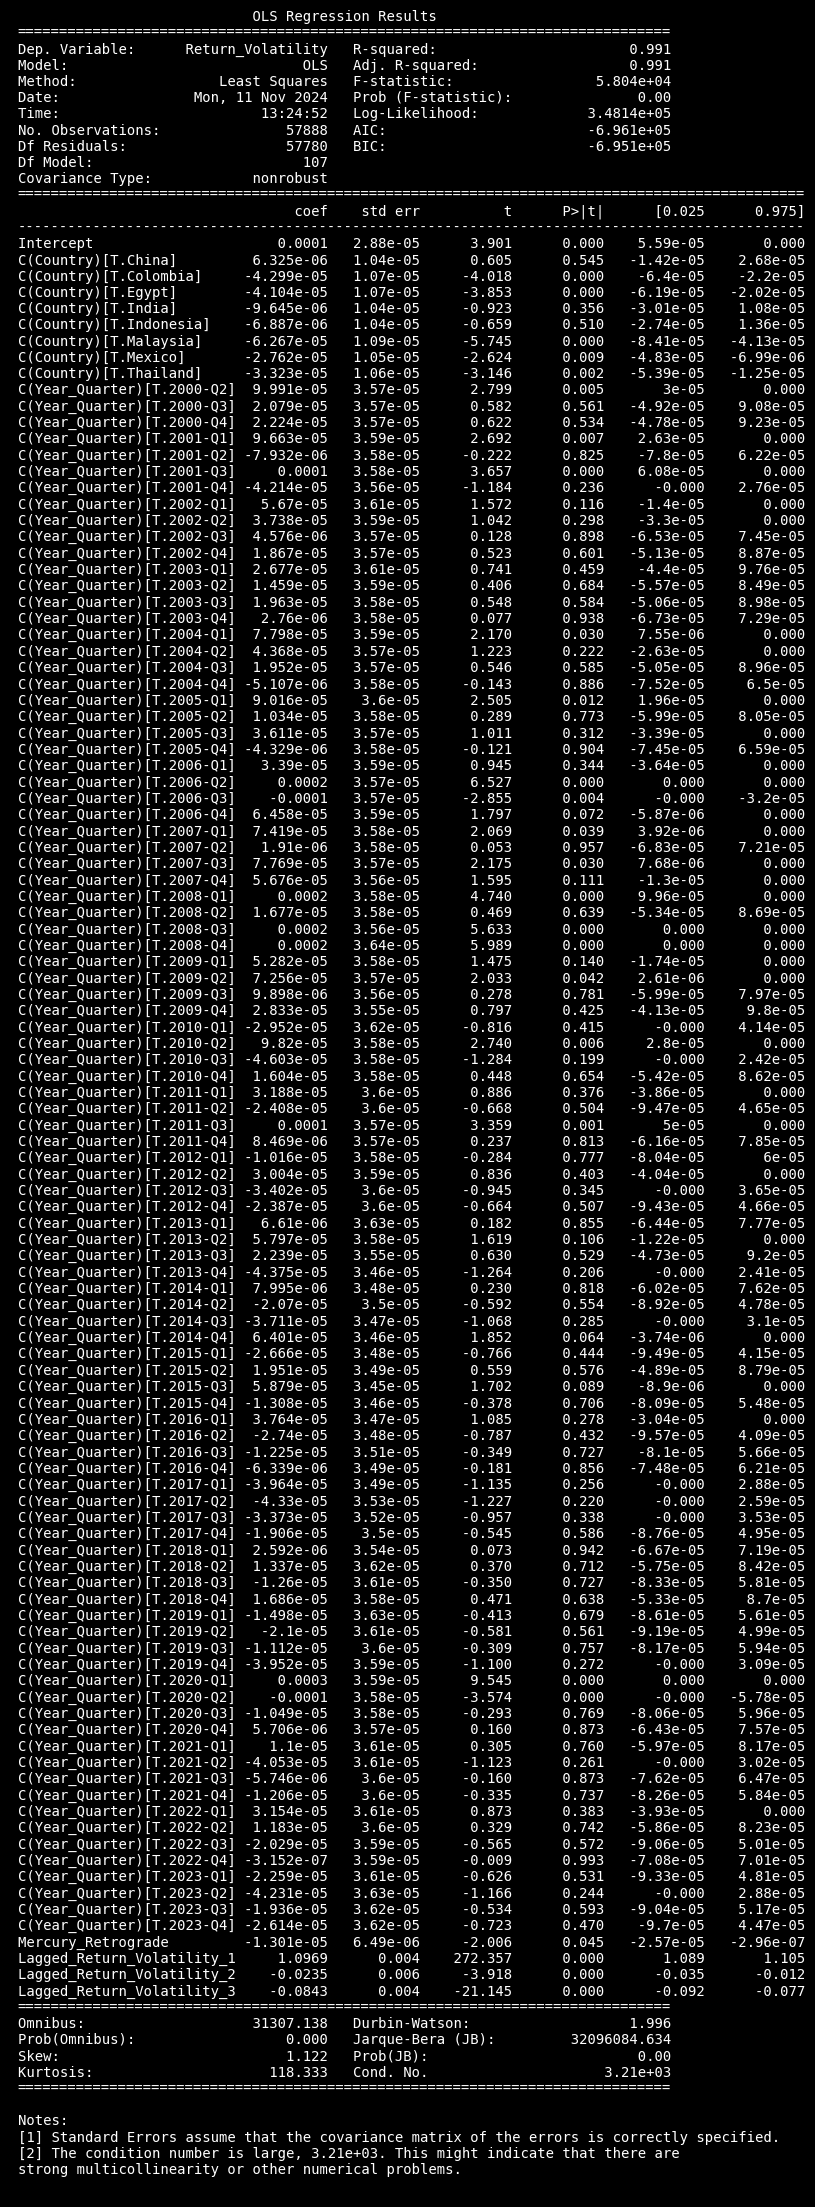

In [73]:
import statsmodels.formula.api as smf
model = smf.ols(formula="Return_Volatility ~ Mercury_Retrograde + Lagged_Return_Volatility_1 + Lagged_Return_Volatility_2 + Lagged_Return_Volatility_3 + C(Country)+ C(Year_Quarter)", data=merged_df)
# Fit the model
results = model.fit()
print(results.summary())

summary_text = results.summary().as_text()
plt.figure(figsize=(10, 6))
plt.text(0.01, 0.05, summary_text, fontsize=10, family='monospace')
plt.axis('off')
buf = BytesIO()
plt.savefig(buf, format="png", bbox_inches='tight')
buf.seek(0)
image = Image.open(buf)
image.show()